## Set-up

In [1]:
#importing the boyz
import numpy as np
import pandas as pd
import statistics as sta
from PIL import Image
import requests as req
import math
import seaborn as sns

Write classes for discrete uniform, binomial, normal, power law

Include mean, var, pdf, cdf

## Discrete Uniform

"In probability theory and statistics, the discrete uniform distribution is a symmetric probability distribution wherein a finite number of values are equally likely to be observed; every one of n values has equal probability 1/n. Another way of saying "discrete uniform distribution" would be "a known, finite number of outcomes equally likely to happen"."

Source - https://en.wikipedia.org/wiki/Discrete_uniform_distribution

Example - throwing a fair dice. Each value has a probability of 1/6 of occurring.

Parameters - a and b, which form the interval [a, b] 

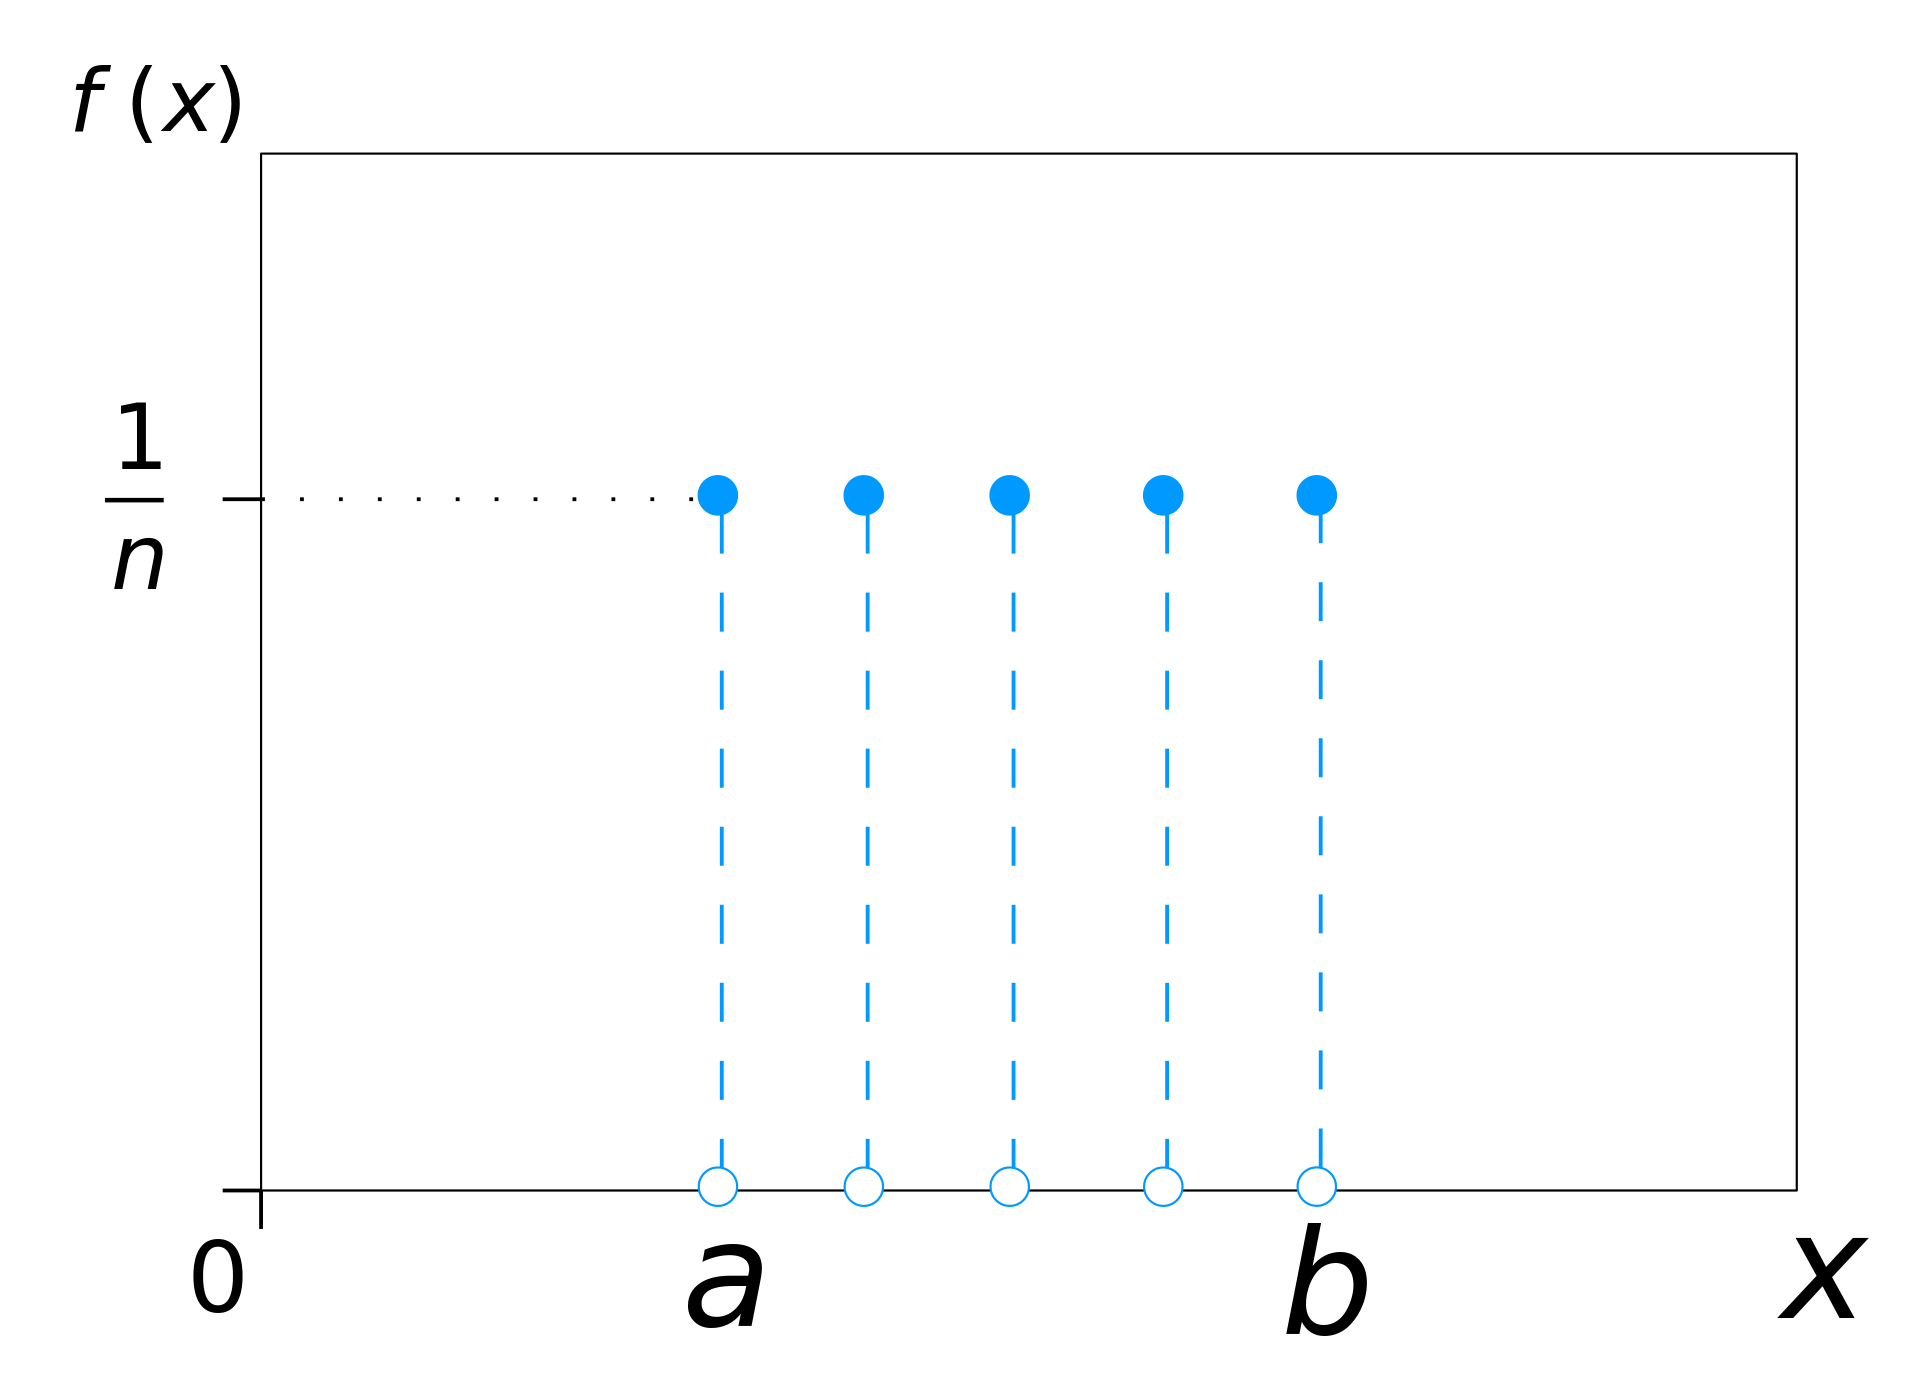

In [35]:
Image.open(req.get('https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Uniform_discrete_pmf_svg.svg/1920px-Uniform_discrete_pmf_svg.svg.png',
                    stream = True).raw)

In [25]:
class uniform:
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.n = b - a + 1
        
    def mean(self):
        return (self.a + self.b)/2
        
    def var(self):
        return (self.n**2 - 1)/12
    
    def pmf(self): # for the range [a. b]
        return 1/self.n
    
    def cdf(self, k):
        return (k - self.a + 1)/self.n

## Binomial

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). 

Source - https://en.wikipedia.org/wiki/Binomial_distribution

Example - if users complete the sign up proccess. Each user/trial is dstributed as a Bernoulli with probability of completing the sign up proccess = p. The collection of these trials will be a binomial distribution.

Parameters - n and p, n is number of trials and p is probability of success in each trial

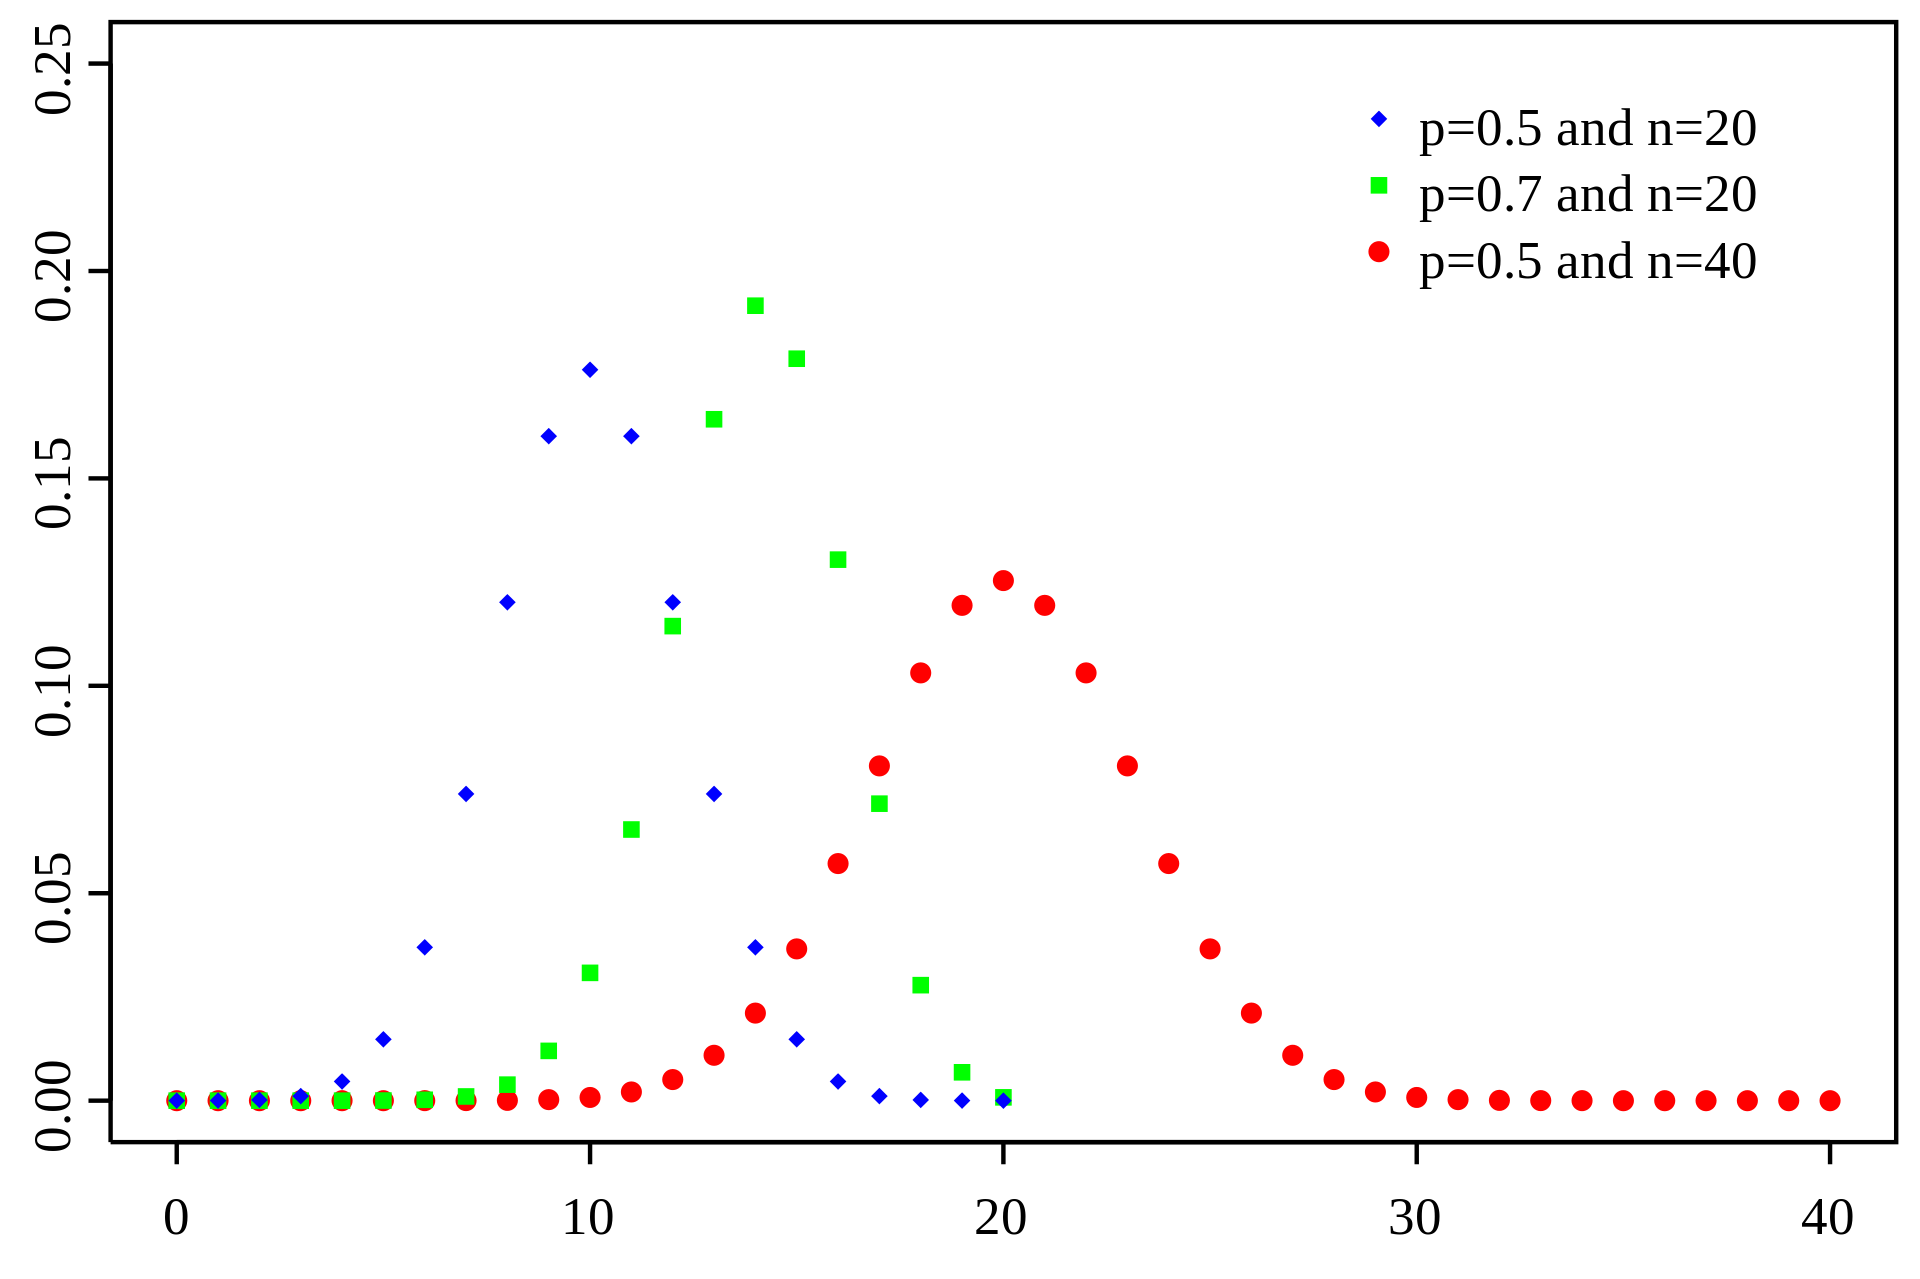

In [36]:
Image.open(req.get('https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Binomial_distribution_pmf.svg/1920px-Binomial_distribution_pmf.svg.png',
                    stream = True).raw)

In [80]:
class binomial:
    
    def __init__(self, n, p):
        self.n = n
        self.p = p
        self.q = 1 - p
        
    def mean(self):
        return self.n*self.p
    
    def variance(self):
        return self.q*self.p*self.n
    #getting the factorial of any number
    @staticmethod
    def fact(f):
        fac = 1
        for i in range(1, f+1):
            fac = fac*i
        return fac
    #nCk for the PMF formula
    def nck(self, n, k):
        return self.fact(n)/(self.fact(k)*self.fact(n - k))
    
    def pmf(self, k):
        return self.nck(self.n, k) * self.p**k * self.p**(self.n - k)
    
    def cdf(self, k):
        cum = 0
        for j in range(1, k+1):
            cum += self.pmf(j)
        return cum

## Normal

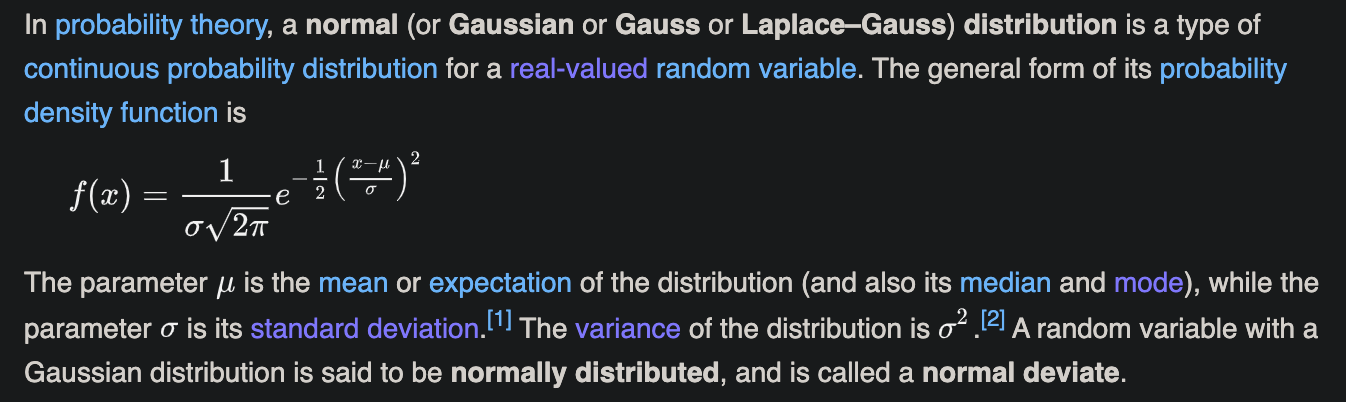

In [2]:
Image.open('Normal_Distribution_Explanation.png')

#source - https://en.wikipedia.org/wiki/Normal_distribution

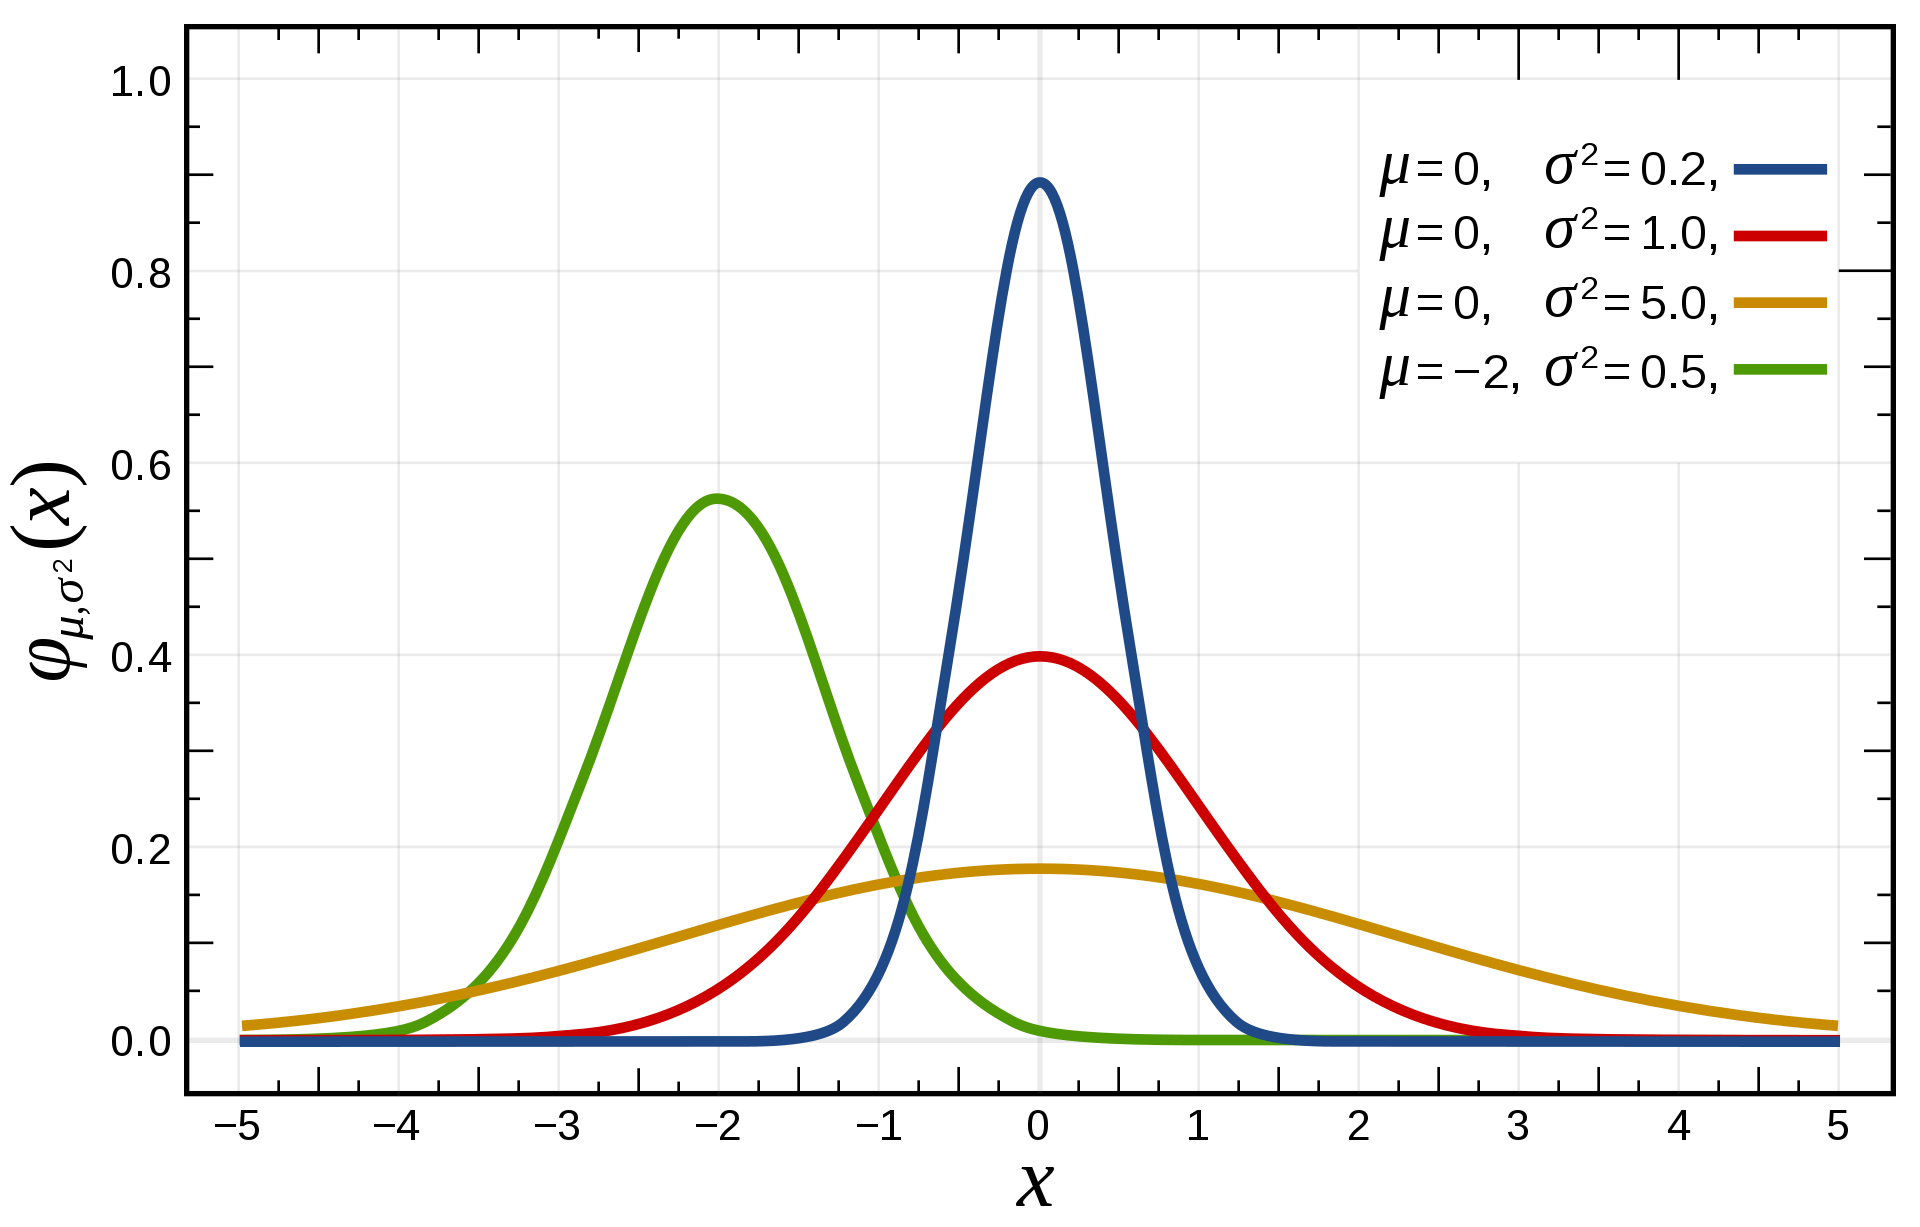

In [3]:
Image.open(req.get('https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1920px-Normal_Distribution_PDF.svg.png',
                    stream = True).raw)

In [29]:
class normal:
    
    def __init__(self, mew, sigma):
        self.mew = mew
        self.sigma = sigma
        
    def mean(self):
        return self.mew
    
    def var(self):
        return self.sigma**2
    
    def pdf(self, k): #specify a value for the corresponding probability density
        return (1/(self.sigma*np.sqrt(2*np.pi))) * np.exp((-1/2)*((k-self.mew)/self.sigma)**2)
    
    #def cdf(self, k): #specify a value for cumilitive probablity
    #use standard normal tables!!!
        